# Customer Relationship Management | CRM Analytics

Customer Relationship Management (CRM) system is an information management and analysis tool that can help businesses and other organizations manage their interactions with customers.

CRMs were originally designed to target large corporations, but the internet has allowed small business owners to take advantage of these tools as well. Customer data is collected in a CRM database, which allows for advanced analysis such as customer segmentation and contact history.

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

In [4]:
import seaborn as sns
import numpy as np
import squarify # treemap
import warnings
pd.set_option ('display.max_columns', 50)
pd.set_option ('display.max_rows', 50)
pd.set_option ('display.float_format', lambda x: '%.2f' % x)
pd.set_option ('display.width', 1000)
warnings.filterwarnings ("ignore")

In [5]:
df= pd.read_excel (r"C:\Users\muhammedhanbaba\OneDrive - Ege Üniversitesi\Masaüstü\pr\online_retail_II.xlsx", sheet_name="Year 2009-2010")

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [7]:
df.shape

(525461, 8)

#### Data Preprocessing

In [8]:
def check_data(dataframe, head=5):
    print ("################ INFO ################")
    print (dataframe.info ())
    print ("################DESCRIBE ################")
    print (dataframe.describe ([0.01, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99]))
    print ("################ NA VALUES ################")
    print (dataframe.isnull ().sum ())
    print ("################ FIRST {} ROWS ################".format (head))
    print (dataframe.head (head))

In [9]:
check_data(df)

################ INFO ################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
################DESCRIBE ################
       Quantity     Price  Customer ID
count 525461.00 525461.00    417534.00
mean      10.34      4.69     15360.65
std      107.42    146.13      1680.81
min    -9600.00 -53594.36     12346.00
1%        -3.00      0.21  

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
check_data(df)

################ INFO ################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB
None
################DESCRIBE ################
       Quantity     Price  Customer ID
count 417534.00 417534.00    417534.00
mean      12.76      3.89     15360.65
std      101.22     71.13      1680.81
min    -9360.00      0.00     12346.00
1%        -2.00      0.29  

In [12]:
def select_country(dataframe, country):
    new_dataframe = dataframe.loc[dataframe["Country"] == country]
    return new_dataframe

In [13]:
select_country(df,"France")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
71,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.00,France
72,489439,22138,BAKING SET 9 PIECE RETROSPOT,9,2009-12-01 09:28:00,4.95,12682.00,France
73,489439,22139,RETRO SPOT TEA SET CERAMIC 11 PC,9,2009-12-01 09:28:00,4.95,12682.00,France
74,489439,22352,LUNCHBOX WITH CUTLERY RETROSPOT,12,2009-12-01 09:28:00,2.55,12682.00,France
75,489439,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,3,2009-12-01 09:28:00,5.95,12682.00,France
...,...,...,...,...,...,...,...,...
524487,538093,22909,SET OF 20 VINTAGE CHRISTMAS NAPKINS,12,2010-12-09 14:49:00,0.85,12682.00,France
524488,538093,22948,METAL DECORATION NAUGHTY CHILDREN,24,2010-12-09 14:49:00,0.85,12682.00,France
524489,538093,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-09 14:49:00,0.85,12682.00,France
524490,538093,22082,RIBBON REEL STRIPES DESIGN,10,2010-12-09 14:49:00,1.65,12682.00,France


In [14]:
def check_outlier(dataframe, col_name, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds (dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any (axis=None):
        return True
    else:
        return False

In [15]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile (q1)
    quartile3 = dataframe[col_name].quantile (q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [16]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds (dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [17]:
replace_with_thresholds(df, "Price")

In [18]:
# We deal with purchases in our analysis. Therefore, we have excluded returns from the data.
df = df[~df["Invoice"].str.contains ("C", na=False)]

In [19]:
df[df["Price"] == 0]["StockCode"].unique ()

array([22076, 48185, 'M', 22065, 22142, 85042, 21143, 79320, 22355, 21533,
       'TEST001', 21662, 22459, 22458, 22376, 21765, 20914, 22423, 22690,
       22472, 22202, '46000M', 22218, 22630, 22121, 21843, 22624, 22846,
       22845, 22841], dtype=object)

In [20]:
df = df[df["StockCode"] != "M"]

In [21]:
invalid_codes = df[df["StockCode"].astype (str).str.contains (r"[a-zA-Z]{3,}")]["StockCode"].unique ().tolist ()

In [22]:
invalid_codes

['POST', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS', 'ADJUST', 'ADJUST2']

In [23]:
df[df["StockCode"].isin (invalid_codes)].groupby (["StockCode"]).agg ({"Invoice": "nunique",
                                                                       "Quantity": "sum",
                                                                       "Price": "sum",
                                                                       "Customer ID": "nunique"})

,Invoice,Quantity,Price,Customer ID
StockCode,,,,
ADJUST,32,32,616.43,25
ADJUST2,3,3,61.86,3
BANK CHARGES,20,20,300.00,12
PADS,14,14,0.01,12
POST,738,2212,13189.03,230
TEST001,11,60,40.50,4
TEST002,1,1,1.00,1


In [24]:
df = df[~df["StockCode"].isin (invalid_codes)].reset_index (drop=True)

In [25]:
check_data (df)

################ INFO ################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406450 entries, 0 to 406449
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406450 non-null  object        
 1   StockCode    406450 non-null  object        
 2   Description  406450 non-null  object        
 3   Quantity     406450 non-null  int64         
 4   InvoiceDate  406450 non-null  datetime64[ns]
 5   Price        406450 non-null  float64       
 6   Customer ID  406450 non-null  float64       
 7   Country      406450 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB
None
################DESCRIBE ################
       Quantity     Price  Customer ID
count 406450.00 406450.00    406450.00
mean      13.62      2.94     15373.48
std       96.99      2.87      1677.23
min        1.00      0.00     12346.00
1%         1.00      0.29  

In [26]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [27]:
df.describe ([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

,Quantity,Price,Customer ID,TotalPrice
count,406450.00,406450.00,406450.00,406450.00
mean,13.62,2.94,15373.48,21.24
std,96.99,2.87,1677.23,68.56
min,1.00,0.00,12346.00,0.00
1%,1.00,0.29,12437.00,0.65
10%,1.00,0.65,13050.00,2.10
25%,2.00,1.25,14006.00,4.95
50%,5.00,1.95,15325.00,11.85
75%,12.00,3.75,16814.00,19.50
90%,24.00,6.75,17706.00,35.40


In [28]:
def cat_summary(dataframe, col_name):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

In [29]:
cat_summary(df,"Country")

                      Country  Ratio
United Kingdom         370510  91.16
EIRE                     8473   2.08
Germany                  7383   1.82
France                   5290   1.30
Netherlands              2662   0.65
Spain                    1195   0.29
Switzerland              1146   0.28
Belgium                   989   0.24
Portugal                  956   0.24
Sweden                    841   0.21
Channel Islands           821   0.20
Italy                     695   0.17
Australia                 625   0.15
Cyprus                    539   0.13
Greece                    511   0.13
Austria                   504   0.12
Denmark                   408   0.10
Norway                    362   0.09
Finland                   338   0.08
United Arab Emirates      313   0.08
Unspecified               277   0.07
USA                       225   0.06
Poland                    181   0.04
Malta                     168   0.04
Japan                     164   0.04
Lithuania                 154   0.04
S

#### Preparation of RFM Metrics

In [30]:
max_invoice_date = df["InvoiceDate"].max ()

In [31]:
today_date = (max_invoice_date + dt.timedelta (days=2))

In [32]:
rfm = df.groupby ("Customer ID").agg ({"InvoiceDate": lambda date: (today_date - date.max ()).days,
                                       "Invoice": "nunique",
                                       "TotalPrice": "sum"})

In [33]:
rfm.head ()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,166,2,169.36
12347.00,4,2,1323.32
12348.00,75,1,221.16
12349.00,44,2,2163.82
12351.00,12,1,300.93


In [34]:
rfm.columns = ["Recency", "Frequency", "Monetary"]

In [35]:
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [36]:
rfm.describe ([0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

,Recency,Frequency,Monetary
count,4286.00,4286.00,4286.00
mean,91.56,4.43,2013.86
std,96.35,7.95,8773.44
min,2.00,1.00,1.55
1%,2.00,1.00,39.63
10%,9.00,1.00,154.61
25%,19.00,1.00,307.11
50%,53.00,2.00,692.27
75%,136.75,5.00,1701.44
90%,255.00,9.00,3725.86


In [37]:
for col in rfm.columns:
    print (col, check_outlier (rfm, col))

Recency False
Frequency True
Monetary True


In [38]:
for col in rfm.columns:
    replace_with_thresholds (rfm, col)

In [39]:
rfm.describe ()

,Recency,Frequency,Monetary
count,4286.00,4286.00,4286.00
mean,91.56,4.11,1578.30
std,96.35,4.89,2505.28
min,2.00,1.00,1.55
25%,19.00,1.00,307.11
50%,53.00,2.00,692.27
75%,136.75,5.00,1701.44
max,375.00,31.00,15138.81


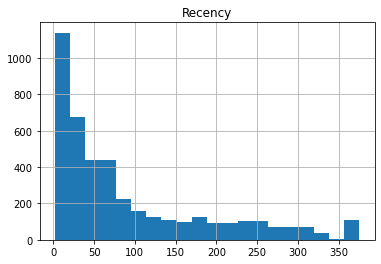

In [40]:
rfm["Recency"].hist (bins=20)
plt.title ("Recency")
plt.show ()

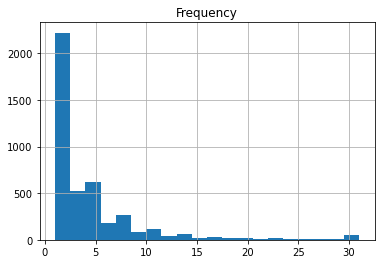

In [41]:
rfm["Frequency"].hist (bins=20)
plt.title ("Frequency")
plt.show ()

#### Generating RFM Scores

In [42]:
# recency_score
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# frequency_score
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# monetary_score
rfm["monetary_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

#  RFM Score
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.00,166.00,2,169.36,2,2,1,22
12347.00,4.00,2,1323.32,5,2,4,52
12348.00,75.00,1,221.16,2,1,1,21
12349.00,44.00,2,2163.82,3,2,5,32
12351.00,12.00,1,300.93,5,1,2,51
12352.00,12.00,2,343.80,5,2,2,52
12353.00,45.00,1,317.76,3,1,2,31
12355.00,204.00,1,488.21,1,1,2,11
12356.00,17.00,3,3126.25,4,3,5,43


#### Segmenting Customers Based on RFM Scores

In [43]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.00,166.00,2,169.36,2,2,1,22,hibernating
12347.00,4.00,2,1323.32,5,2,4,52,potential_loyalists
12348.00,75.00,1,221.16,2,1,1,21,hibernating
12349.00,44.00,2,2163.82,3,2,5,32,about_to_sleep
12351.00,12.00,1,300.93,5,1,2,51,new_customers
12352.00,12.00,2,343.80,5,2,2,52,potential_loyalists
12353.00,45.00,1,317.76,3,1,2,31,about_to_sleep
12355.00,204.00,1,488.21,1,1,2,11,hibernating
12356.00,17.00,3,3126.25,4,3,5,43,potential_loyalists


In [44]:
# group RFM mean and frequency values according to segments
rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep        54.16   334      1.21   334   437.66   334
at_Risk              152.14   615      3.06   615  1153.49   615
cant_loose           126.72    78      8.99    78  3410.78    78
champions              8.10   660     10.43   660  4093.74   660
hibernating          211.85  1014      1.12  1014   388.08  1014
loyal_customers       36.92   732      6.76   732  2616.88   732
need_attention        53.77   197      2.44   197  1015.50   197
new_customers          9.58    50      1.00    50   376.84    50
potential_loyalists   19.81   517      2.02   517   714.62   517
promising             26.78    89      1.00    89   490.93    89

#### Visualization of RFM Segments

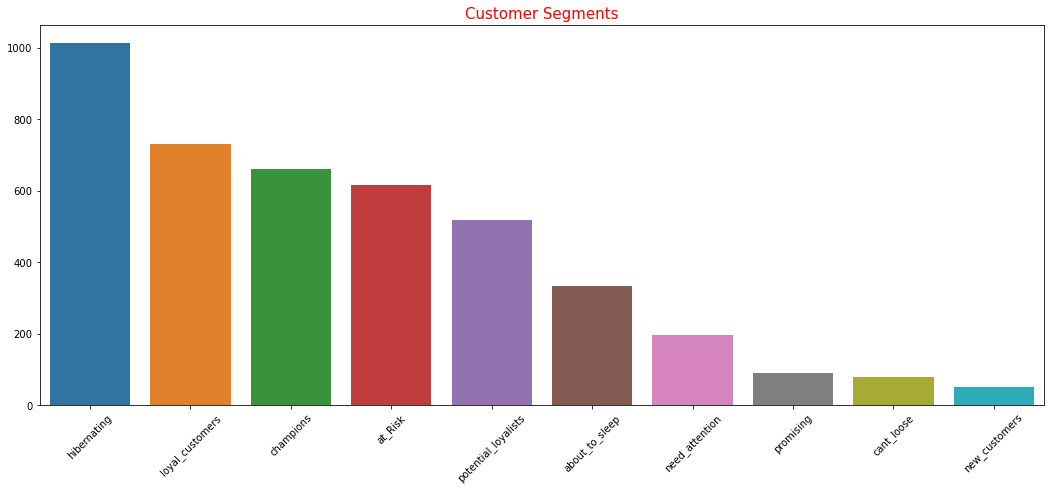

In [45]:
sgm= rfm["segment"].value_counts()
plt.figure(figsize=(18,7))
sns.barplot(x=sgm.index, y=sgm.values)
plt.xticks(rotation=45)
plt.title('Customer Segments',color = 'red',fontsize=15)
plt.show()

In [74]:
rfm1 = rfm[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean","median", "count"])
rfm1.columns = rfm1.columns.droplevel(0)
rfm1.reset_index(inplace=True)
rfm1.columns = ["segment","boş","boş","count","boş","boş","boş","boş","boş","boş"]
rfm1 = rfm1.sort_values(by="count", ascending=False)

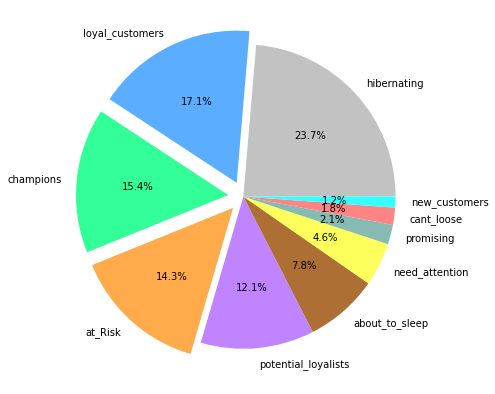

In [76]:
colors = ['#C2C2C2', '#5BADFF', '#33FF99', '#FFAB4B', 
          '#C184FF', '#AD6F33','#FFFF5B','#85BBB2',
          '#FF8484','#33FFFF']

fig1, ax1 = plt.subplots(figsize=(10,7))

ax1.pie(rfm1["count"] ,labels=rfm1["segment"].unique() ,colors=colors, 
        explode=[0,0.1,0.1,0.1,0,0,0,0,0,0] ,autopct='%1.1f%%');

In [46]:
df_treemap = rfm.groupby('segment').agg('count').reset_index()
df_treemap.head()

,segment,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,about_to_sleep,334,334,334,334,334,334,334
1,at_Risk,615,615,615,615,615,615,615
2,cant_loose,78,78,78,78,78,78,78
3,champions,660,660,660,660,660,660,660
4,hibernating,1014,1014,1014,1014,1014,1014,1014


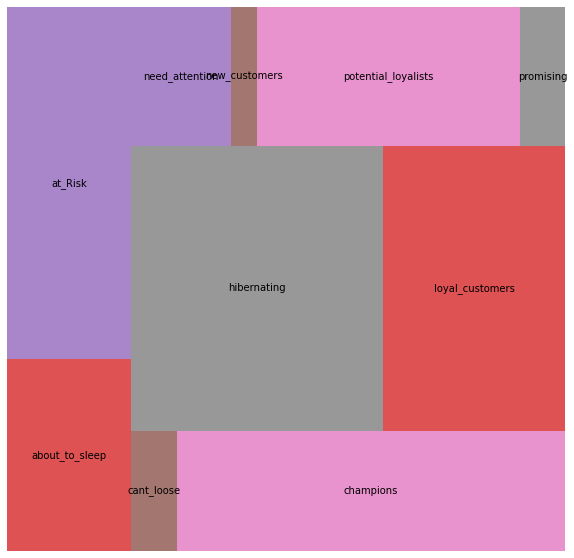

In [47]:
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['RFM_SCORE'], 
              label=df_treemap['segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
plt.show()

### Customer Lifetime Value

Customer lifetime value (CLV), a term sometimes used interchangeably with customer lifetime value, is the prediction of a company's net profit contributed to its overall future relationship with a customer. The model can be simple or sophisticated, depending on how complex the predictive analytics techniques are.

#### Formula

Probabilistic lifetime value estimation with time projection

**CLTV** =( Customer Value / Churn Rate) * Profit Margin

**Customer Value** = Purchase Frequency * Average Order Value

**CLTV** = Expected Number of Transaction * Expected Average Profit

Above, purchase frequency and number of transaction mean the same thing. Likewise, Average Order Value and Average Profit mean the same thing. It differs with the Expected part that happens to them.

**CAUTION**: It will add a probabilistic distribution. Expected statement refers to this part. Expected number of purchases, expected profitability.

BG / NBD = Expected Transaction
Gamma Gamma = Expected Profit

#### Preparation-Data Structure of CLTV

**Recency**: the difference between the customer's last purchase and his first purchase

**T**: is defined as the time from the customer's first contact with the company to the date we set a reference.

**Frequency**: total number of repeat purchases

**Monetary_value**: average earnings per purchase

In [48]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].max()

Timestamp('2010-12-09 20:01:00')

In [49]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                         lambda date: (today_date - date.min()).days],
                                         'Invoice': lambda num: num.nunique(),
                                         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [50]:
cltv_df.columns = cltv_df.columns.droplevel(0)

In [51]:
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

In [52]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.00,118,284,2,169.36
12347.00,37,41,2,1323.32
12348.00,0,75,1,221.16
12349.00,181,226,2,2163.82
12351.00,0,12,1,300.93


In [53]:
# We will determine the monetary value as the average earnings per purchase.
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

# Selection of monetary greater than zero
cltv_df = cltv_df[cltv_df["monetary"] > 0]

# Expression of recency and T for BG NBD in weekly terms
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

# Selection of frequency greater than 1
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.00,16.86,40.57,2,84.68
12347.00,5.29,5.86,2,661.66
12349.00,25.86,32.29,2,1081.91
12352.00,2.29,4.14,2,171.90
12356.00,6.29,8.71,3,1042.08


#### BG-NBD Model

BG / NBD (Beta Geometric / Negative Binominal Distribution) = Expected Number of Transaction


##### Buy Till You Die
The BG/NBD Model probabilistically models two processes for the Expected Number of Transaction.

Transaction Process (Buy) + Dropout Process (Till You Die)

In [54]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2872 subjects, a: 0.14, alpha: 11.21, b: 2.72, r: 2.16>

In [55]:
# 1 week expected purchase (transaction)
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

cltv_df.sort_values("expected_purc_1_week", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
14911.00,53.29,53.57,184,767.84,2.87
17850.00,51.71,53.00,155,328.72,2.39
12748.00,52.71,53.14,133,148.92,2.09
15311.00,53.29,53.57,120,463.28,1.88
13089.00,52.57,53.43,109,531.13,1.71
14606.00,52.71,53.29,97,190.55,1.53
13694.00,51.57,53.14,94,1398.33,1.47
17841.00,53.14,53.43,91,316.25,1.44
14156.00,52.29,53.57,91,2046.14,1.42


In [56]:
# 1 month expected purchase
cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

cltv_df.sort_values("expected_purc_1_month", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,
14911.00,53.29,53.57,184,767.84,2.87,11.43
17850.00,51.71,53.00,155,328.72,2.39,9.54
12748.00,52.71,53.14,133,148.92,2.09,8.34
15311.00,53.29,53.57,120,463.28,1.88,7.50
13089.00,52.57,53.43,109,531.13,1.71,6.81
14606.00,52.71,53.29,97,190.55,1.53,6.10
13694.00,51.57,53.14,94,1398.33,1.47,5.86
17841.00,53.14,53.43,91,316.25,1.44,5.73
14156.00,52.29,53.57,91,2046.14,1.42,5.67


#### Gamma Gamma Model

It is used to estimate how much profit a customer can generate on average per transaction.

**What will the gamma gamma model do?**

It will output the Expected Average Profit. This means; The Expected Average Profit distribution will be modeled over the whole audience, and the Gamma Gamma Submodel will be conditionally giving us the Expected Average Profit for a person, taking into account the distribution of the whole audience, according to the characteristics of the person himself.

In [57]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2872 subjects, p: 3.79, q: 0.34, v: 3.73>

In [58]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

cltv_df.sort_values("expected_average_profit", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
Customer ID,,,,,,,
17450.00,10.00,10.71,7,7488.90,0.41,1.62,7680.68
13902.00,13.14,51.57,5,6804.65,0.01,0.02,7051.20
17940.00,41.57,53.29,5,5247.48,0.10,0.41,5437.78
14091.00,6.29,47.86,2,4765.04,0.01,0.04,5221.99
12415.00,21.71,23.43,4,4864.88,0.17,0.68,5087.49
14088.00,2.00,8.29,3,4425.68,0.22,0.86,4699.99
12454.00,3.57,8.29,3,4310.48,0.23,0.93,4577.68
18102.00,53.29,53.57,89,3884.91,1.40,5.59,3892.57
14028.00,0.00,26.71,3,3465.50,0.01,0.03,3680.58


#### BG-NBD and GG Model For Prediction

In [59]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=6,  # 6 months
                                   freq="W",  # Frequency information of T.
                                   discount_rate=0.01)

In [60]:
# Reset index
cltv = cltv.reset_index()
# Merging the main table and the forecast values table
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
# sorting
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
2806,18102.00,53.29,53.57,89,3884.91,1.40,5.59,3892.57,134268.53
1084,14646.00,51.71,53.43,73,3383.45,1.15,4.57,3391.60,95538.67
2478,17450.00,10.00,10.71,7,7488.90,0.41,1.62,7680.68,74352.35
835,14156.00,52.29,53.57,91,2046.14,1.42,5.67,2050.11,71733.87
1216,14911.00,53.29,53.57,184,767.84,2.87,11.43,768.59,54172.12
606,13694.00,51.57,53.14,94,1398.33,1.47,5.86,1400.97,50628.93
2502,17511.00,52.71,53.43,31,2724.02,0.51,2.03,2739.54,34313.59
2116,16754.00,38.43,39.71,29,2258.62,0.61,2.41,2272.41,33621.53
2080,16684.00,50.29,52.71,27,2981.08,0.45,1.79,3000.59,33118.13
1287,15061.00,53.00,53.57,86,968.41,1.35,5.40,970.42,32333.59


In [61]:
# 1 Month CLTV:
cltv_1 = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=1,  # 1 month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

cltv_1.head()
cltv_1= cltv_1.reset_index()
cltv_1 = cltv_df.merge(cltv_1, on="Customer ID", how="left")
cltv_1.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
2806,18102.00,53.29,53.57,89,3884.91,1.40,5.59,3892.57,23404.33
1084,14646.00,51.71,53.43,73,3383.45,1.15,4.57,3391.60,16654.19
2478,17450.00,10.00,10.71,7,7488.90,0.41,1.62,7680.68,13339.03
835,14156.00,52.29,53.57,91,2046.14,1.42,5.67,2050.11,12503.91
1216,14911.00,53.29,53.57,184,767.84,2.87,11.43,768.59,9442.45
606,13694.00,51.57,53.14,94,1398.33,1.47,5.86,1400.97,8826.12
2502,17511.00,52.71,53.43,31,2724.02,0.51,2.03,2739.54,5982.03
2116,16754.00,38.43,39.71,29,2258.62,0.61,2.41,2272.41,5888.42
2080,16684.00,50.29,52.71,27,2981.08,0.45,1.79,3000.59,5774.89
1287,15061.00,53.00,53.57,86,968.41,1.35,5.40,970.42,5636.08


In [62]:
# 12 Month CLTV Forecast:

cltv_12 = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=12,  # 1 aylık
                                   freq="W",  # T'nin frekans bilgisi
                                   discount_rate=0.01)

cltv_12.head()
cltv_12 = cltv_12.reset_index()
cltv_12 = cltv_df.merge(cltv_12, on="Customer ID", how="left")
cltv_12.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
2806,18102.00,53.29,53.57,89,3884.91,1.40,5.59,3892.57,255692.90
1084,14646.00,51.71,53.43,73,3383.45,1.15,4.57,3391.60,181930.51
2478,17450.00,10.00,10.71,7,7488.90,0.41,1.62,7680.68,138877.92
835,14156.00,52.29,53.57,91,2046.14,1.42,5.67,2050.11,136605.81
1216,14911.00,53.29,53.57,184,767.84,2.87,11.43,768.59,103164.65
606,13694.00,51.57,53.14,94,1398.33,1.47,5.86,1400.97,96405.77
2502,17511.00,52.71,53.43,31,2724.02,0.51,2.03,2739.54,65337.26
2116,16754.00,38.43,39.71,29,2258.62,0.61,2.41,2272.41,63788.46
2080,16684.00,50.29,52.71,27,2981.08,0.45,1.79,3000.59,63049.78
1287,15061.00,53.00,53.57,86,968.41,1.35,5.40,970.42,61574.05


### Segmentation on CLTV Forecasts

In [63]:
# Normalization 0-1 Range For CLV Values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
2806,18102.00,53.29,53.57,89,3884.91,1.40,5.59,3892.57,134268.53,1.00
1084,14646.00,51.71,53.43,73,3383.45,1.15,4.57,3391.60,95538.67,0.71
2478,17450.00,10.00,10.71,7,7488.90,0.41,1.62,7680.68,74352.35,0.55
835,14156.00,52.29,53.57,91,2046.14,1.42,5.67,2050.11,71733.87,0.53
1216,14911.00,53.29,53.57,184,767.84,2.87,11.43,768.59,54172.12,0.40


In [64]:
# Segmentation of Customers
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()

cltv_final.head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
0,12346.00,16.86,40.57,2,84.68,0.05,0.22,94.81,125.53,0.00,D
1,12347.00,5.29,5.86,2,661.66,0.23,0.92,726.87,3963.72,0.03,A
2,12349.00,25.86,32.29,2,1081.91,0.09,0.35,1187.24,2570.55,0.02,A
3,12352.00,2.29,4.14,2,171.90,0.25,1.00,190.35,1124.36,0.01,B
4,12356.00,6.29,8.71,3,1042.08,0.24,0.97,1107.68,6384.06,0.05,A


In [65]:
# Examination of Segments
cltv_final.groupby("segment").agg({"std", "mean", "sum"})

Customer ID                     recency                    T                frequency             monetary                  expected_purc_1_week             expected_purc_1_month             expected_average_profit                      clv                    scaled_clv           
               mean     std         sum    mean   std      sum  mean   std      sum      mean   std   sum     mean    std       sum                 mean  std    sum                  mean  std    sum                    mean    std       sum    mean     std        sum       mean  std   sum
segment                                                                                                                                                                                                                                                                                         
D          15547.37 1666.64 11163009.00   22.28 15.09 16000.57 41.44 10.91 29754.29      3.22  2.64  2315   204.93 157.83 147142.57                 0.07 0.04  47.01                  0.26 0.17 187.19                  221.32 169.13 158908.88  279.05  155.96  200356.43       0.00 0.00  1.49
C          15424.81 1628.16 11075011.00   29.86 14.41 21438.71 37.39 13.33 26844.14      4.21  3.39  3021   271.63 171.08 195032.32                 0.12 0.06  87.57                  0.49 0.22 348.47                  289.32 183.67 207730.43  739.41  127.51  530898.47       0.01 0.00  3.95
B          15293.64 1665.32 10980837.00   29.89 16.12 21459.43 35.36 15.72 25385.29      5.46  3.52  3920   381.11 328.84 273639.53                 0.16 0.07 115.19                  0.64 0.27 458.10                  401.91 349.35 288570.19 1300.26  216.17  933589.68       0.01 0.00  6.95
A          15170.49 1734.75 10892414.00   32.52 17.69 23347.43 36.27 17.35 26045.14     11.57 16.43  8304   679.34 588.09 487764.65                 0.27 0.24 192.49                  1.07 0.97 765.97                  706.59 611.98 507333.70 4383.70 8320.92 3147494.46       0.03 0.06 23.44